In [1]:
import xarray as xr
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

# Spin up a little cluster with `dask-jobqueue`

### Specs for an individual worker

In [2]:
cluster = SLURMCluster(walltime='00:10:00', cores=1, memory='6GB', job_extra=['--qos="express"'])

### Scale up to n workers

In [3]:
cluster.scale(jobs=4)

In [4]:
client = Client(cluster)
client

Client Scheduler: tcp://10.141.1.208:36005 Dashboard: http://10.141.1.208:8787/status,Cluster Workers: 4 Cores: 4 Memory: 24.00 GB


# Do something with the cluster

In [5]:
example_path = '/scratch1/projects/dcfp/data/csiro-dcfp-jra55/surface_month.zarr'
test = xr.open_zarr(example_path, consolidated=True)

In [6]:
# Get the monthly anomalies of temperature
anom = test['TMP_GDS0_HTGL'].groupby(
    'initial_time0_hours.month').apply(
    lambda x: x - x.mean('initial_time0_hours'))

/OSM/CBR/OA_DCFP/apps/squ027/miniconda3/envs/pangeo/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 62 times more chunks
  return self.array[key]


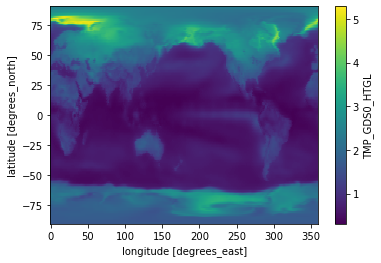

In [7]:
# Plot the standard deviation of the anomalies
anom.std('initial_time0_hours').plot()

In [8]:
cluster.close()
client.close()